<a href="https://colab.research.google.com/github/nasyawa/MachineLearning-2023/blob/main/3F_22_Nasyawa_Ramadhia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**QUIZ 1 - Nasyawa Ramadhia 2141720011 // 22**

# **Klasifikasi Tulisan Tangan dengan Dataset MNIST**

## Detail Kuis

1. Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset MNIST yang digunakan? Jelaskan jawaban kelompok Anda dan buktikan!

2. Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya. Anda dapat menggunakan referensi dari Job Sheet 03.

3. Lakukan proses ekstraksi fitur pada data MNIST. Pada proses ini, Anda diperbolehkan untuk
    - Langsung menggunakan nilai asli dari citra (nilai asli setiap pixel dari dataset) sebagai fitur.
    - Melakukan ekstraksi fitur lain seperti histogram, PCA, atau yang lainnya. Anda diperbolehkan melakukan ekspolarasi pada proses ini.

4. Buatlah data training dan data testing menggunakan rasio 70:30, 80:20, 90:10.

4. Lakukan proses klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM.
   - Anda diperbolehkan untuk melakukan tunning parameter.
   - Anda diperbolehkan mengeksplorasi jenis kernel yang digunakan pada SVM.

5. Evaluasi model yang Anda buat terhadap data training dan data testing.
   - Gunakan metric *accuracy* untuk mengetahui tingkat akurasi data training dan data testing.
   - Gunakan fungsi *classification_report* untuk mengetahui performa model secara holistik.
   - Gunakan confusion matrix untuk mengetahui tingkat ketepatan pelabelan.

6. Tampilkan citra data testing berserta hasil pelabelannya. Anda dapat menggunakan Job Sheet 03 sebagai acuan.

7. Apa model terbaik yang Anda dapatkan? Bagaimana konfigurasinya? Berapa tingkat akurasi yang didapatkan? Jelaskan!


**Import Library**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**Unduh Dataset MNIST, Baca deskripsi dataset**

In [ ]:
from sklearn.datasets import fetch_openml

#dataset MNIST
mnist = fetch_openml("mnist_784", version=1, as_frame=False)

print(mnist.DESCR)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

**Inspeksi semua key dalam dataset,
Cara ini digunakan untuk memahami struktur dari dataset MNIST**

In [ ]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

## 1.Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset MNIST yang digunakan? Jelaskan jawaban kelompok Anda dan buktikan!

**Membaca data, menyiapkan, melabel dan mengordinir data**

In [ ]:
mnist_df = pd.DataFrame(data=mnist.data, columns=mnist.feature_names)
mnist_df['target'] = mnist.target.astype(int)  # Menambahkan kolom target sebagai label

X = mnist.data
y = mnist.target.astype(int)

**menghitung jumlah sampel,rasio untuk mengidentifikasi apakah ada ketidakseimbangan kelas dalam dataset.**

In [ ]:
class_counts = np.bincount(y)

# Hitung jumlah sampel dalam kelas mayoritas
majority_class_count = np.max(class_counts)

# Hitung jumlah sampel dalam kelas minoritas
minority_class_count = np.min(class_counts)

# Hitung rasio kelas
class_ratio = majority_class_count / minority_class_count

print(f"Rasio Kelas: {class_ratio:.2f}")

Rasio Kelas: 1.25


**memvisualisasikan dalam grafik batang, distribusi jumlah data per kelas dalam dataset MNIST**

1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: target, dtype: int64


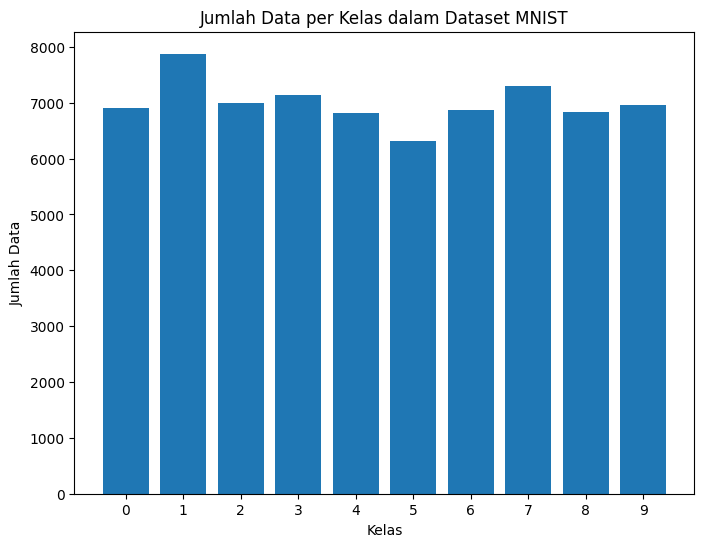

In [ ]:
#menghitung jumlah data
class_counts = mnist_df['target'].value_counts()

print(class_counts)

plt.figure(figsize=(8, 6))
plt.bar(class_counts.index, class_counts.values) #grafik batang
plt.xlabel('Kelas')
plt.ylabel('Jumlah Data')
plt.title('Jumlah Data per Kelas dalam Dataset MNIST')
plt.xticks(class_counts.index)
plt.show()

**Tidak seimbang,**
kelas 1 memiliki jumlah data tertinggi dengan 7.877 sampel, sedangkan kelas 5 memiliki jumlah data terendah dengan 6.313 sampel.

**Oversampling pd kelas minoritas, untuk mencapai balancing data**

5    7877
0    7877
4    7877
1    7877
9    7877
2    7877
3    7877
6    7877
7    7877
8    7877
dtype: int64


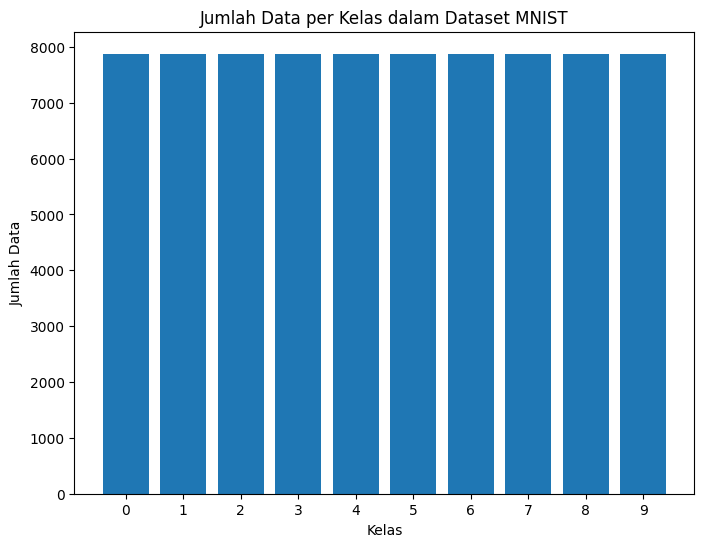

In [ ]:
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

class_counts_resampled = pd.Series(y_resampled).value_counts()
print(class_counts_resampled)

plt.figure(figsize=(8, 6))
plt.bar(class_counts_resampled.index, class_counts_resampled.values)
plt.xlabel('Kelas')
plt.ylabel('Jumlah Data')
plt.title('Jumlah Data per Kelas dalam Dataset MNIST')
plt.xticks(class_counts_resampled.index)
plt.show()

In [ ]:
# Hitung jumlah sampel dalam kelas mayoritas dan kelas minoritas
class_counts = np.bincount(y_resampled)
majority_class_count = np.max(class_counts)
minority_class_count = np.min(class_counts)

# Hitung rasio kelas
class_ratio = majority_class_count / minority_class_count

print(f"Rasio Kelas: {class_ratio:.2f}")

Rasio Kelas: 1.00


**Jadi,** Semakin tinggi rasio, semakin tidak seimbang data. Jika rasio ini mendekati 1, maka data cenderung seimbang.

## 2. Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya. Anda dapat menggunakan referensi dari Job Sheet 03.

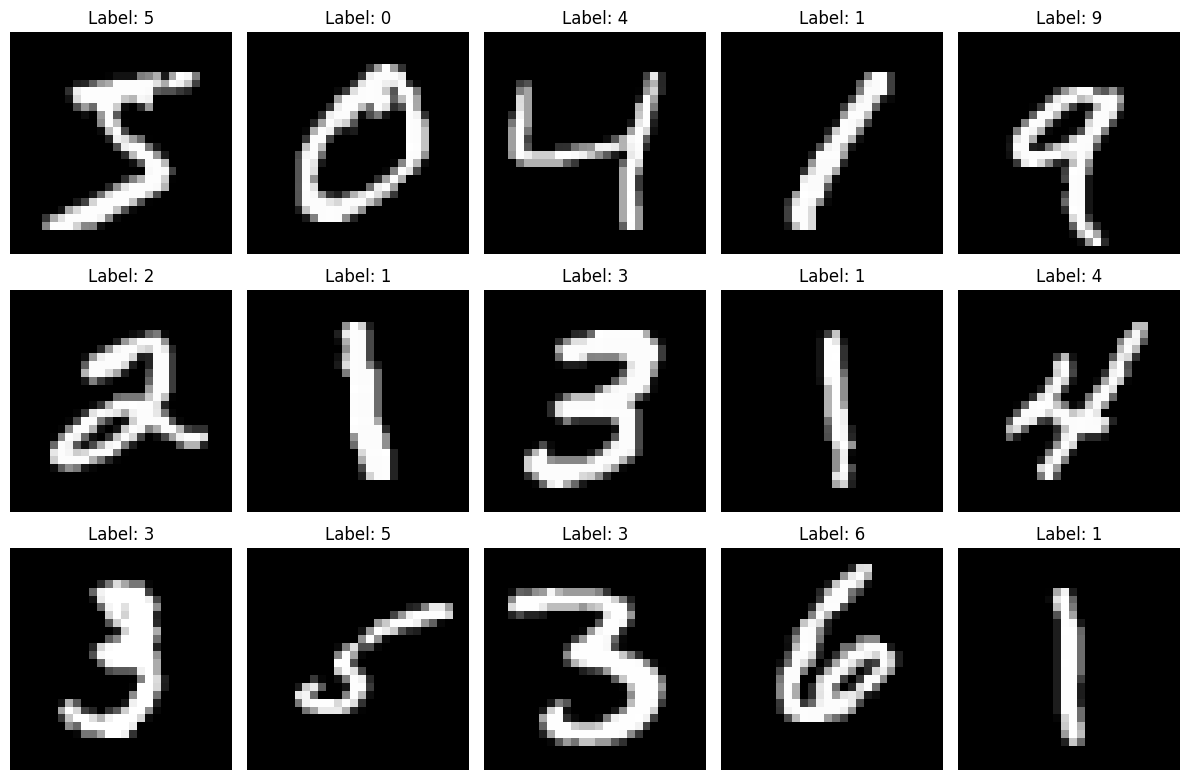

In [ ]:
# 15 gambar pertama dan labelnya
images = X_resampled[:15]
labels = y_resampled[:15]

# menentukan dimensi subplot
num_rows = 3
num_cols = 5

# Buat subplot setiap gambarnya
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

for i in range(num_rows):
    for j in range(num_cols):
        index = i * num_cols + j
        ax = axes[i, j]
        image = images[index].reshape(28, 28)  # Reshape gambar ke dimensi asli (28x28)
        label = labels[index]

        # menampilkan gambar
        ax.imshow(image, cmap='gray')
        ax.set_title(f"Label: {label}")
        ax.axis('off')

plt.tight_layout()
plt.show()

##3. Lakukan proses ekstraksi fitur pada data MNIST. Pada proses ini, Anda diperbolehkan untuk

- Langsung menggunakan nilai asli dari citra (nilai asli setiap pixel dari dataset) sebagai fitur.
- Melakukan ekstraksi fitur lain seperti histogram, PCA, atau yang lainnya. Anda diperbolehkan melakukan ekspolarasi pada proses ini.

In [ ]:
from sklearn.decomposition import PCA
# Inisialisasi model PCA dengan komponen utama yang diinginkan
n_components = 15
pca = PCA(n_components=n_components)

# Latih model PCA pada dataset MNIST
X_pca = pca.fit_transform(X_resampled)

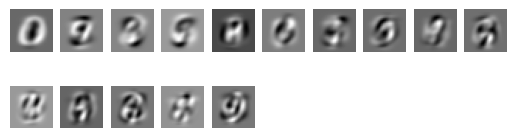

In [ ]:
#visualisasi
for i in range(n_components):
    plt.subplot(5, 10, i + 1)
    plt.imshow(pca.components_[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

plt.show()

##4. Buatlah data training dan data testing menggunakan rasio 70:30, 80:20, 90:10.

**Rasio 70:30**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

**naive bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Inisialisasi model Naive Bayes Multinomial
model = MultinomialNB()

In [ ]:
model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Prediksi label pada data pengujian
y_pred = model.predict(X_test)

# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)

# Tampilkan laporan klasifikasi
report = classification_report(y_test, y_pred)
print("Laporan Klasifikasi:\n", report)

Akurasi: 0.8242139562439169
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.92      0.91      0.92      2344
           1       0.86      0.94      0.90      2314
           2       0.88      0.83      0.85      2345
           3       0.78      0.81      0.79      2366
           4       0.85      0.74      0.79      2336
           5       0.87      0.66      0.75      2362
           6       0.87      0.92      0.89      2380
           7       0.93      0.82      0.87      2371
           8       0.67      0.77      0.72      2404
           9       0.69      0.85      0.76      2409

    accuracy                           0.82     23631
   macro avg       0.83      0.82      0.83     23631
weighted avg       0.83      0.82      0.82     23631



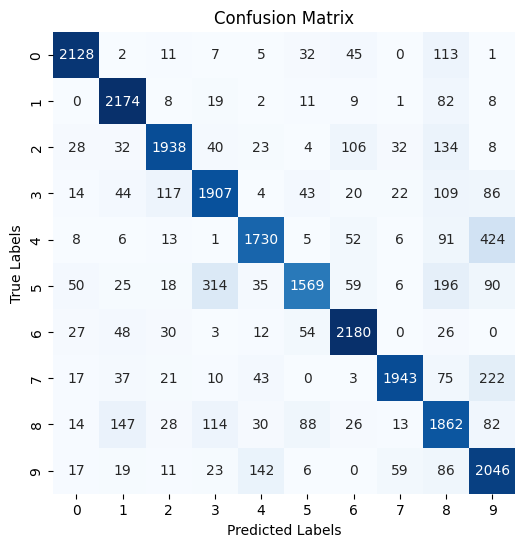

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Tampilkan confusion matrix dalam bentuk heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", square=True, cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

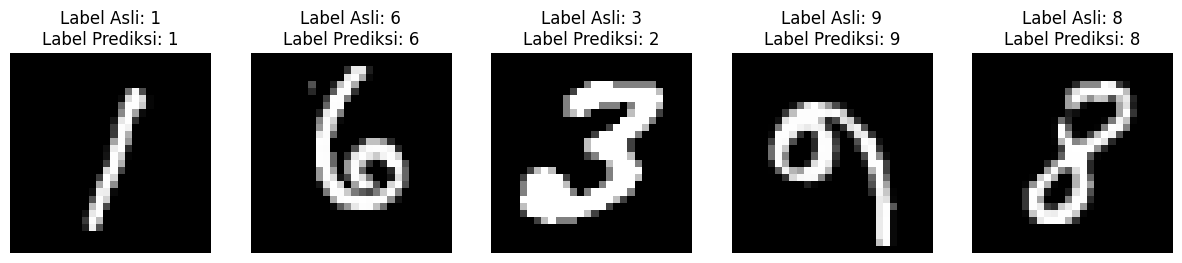

In [ ]:
from sklearn.naive_bayes import MultinomialNB
# Membuat dan melatih model Multinomial Naive Bayes
mnb2 = MultinomialNB()
mnb2.fit(X_train, y_train)

# Pilih beberapa contoh citra dari data pengujian
num_samples = 5  # Ganti jumlah contoh yang ingin ditampilkan sesuai kebutuhan

# Membuat layout subplot horizontal
fig, axs = plt.subplots(1, num_samples, figsize=(15, 4))

for i in range(num_samples):
    sample_index = np.random.randint(len(X_test))
    sample_image = X_test[sample_index]
    true_label = y_test[sample_index]

    # Prediksi dengan model Multinomial Naive Bayes
    nb_prediction = mnb2.predict([sample_image])[0]

    # Menampilkan citra pengujian dan hasil prediksi
    axs[i].imshow(np.reshape(sample_image, (28, 28)), cmap='gray')
    axs[i].set_title(f"Label Asli: {true_label}\nLabel Prediksi: {nb_prediction}")
    axs[i].axis('off')

plt.show()

**SVM**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.svm import SVC

svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [42]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(report)

Accuracy: 0.9325462316448733
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2344
           1       0.95      0.98      0.96      2314
           2       0.91      0.92      0.91      2345
           3       0.90      0.91      0.90      2366
           4       0.93      0.95      0.94      2336
           5       0.91      0.91      0.91      2362
           6       0.97      0.95      0.96      2380
           7       0.95      0.94      0.95      2371
           8       0.93      0.88      0.90      2404
           9       0.93      0.91      0.92      2409

    accuracy                           0.93     23631
   macro avg       0.93      0.93      0.93     23631
weighted avg       0.93      0.93      0.93     23631



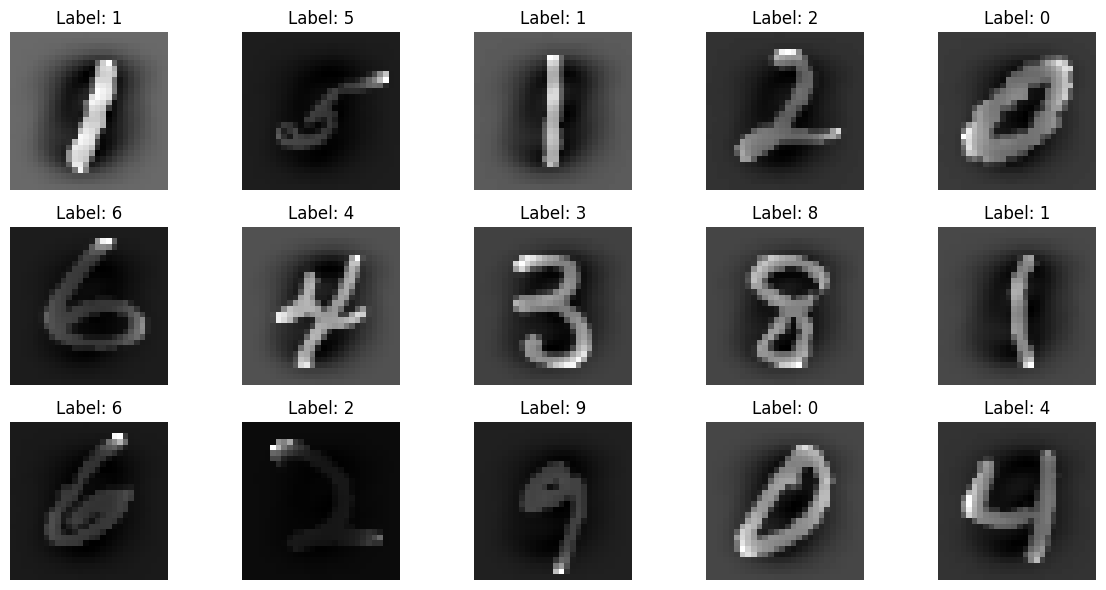

In [43]:
plt.figure(figsize=(12, 6))
num_rows = 3
num_cols = 5

for i in range(num_rows * num_cols):
    ax = plt.subplot(num_rows, num_cols, i + 1)
    img = np.array(X_test[i]).reshape(28, 28)
    ax.imshow(img, cmap='gray')
    ax.set_title(f'Label: {y_pred[i]}')
    if y_pred[i] != y_test[i]:  # Compare y_pred[i] with y_test[i]
        ax.title.set_color('red')
    ax.axis('off')

plt.tight_layout()
plt.show()

**Rasio 80:20**

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

**Naive Bayes**

In [48]:
from sklearn.naive_bayes import MultinomialNB

# Inisialisasi model Naive Bayes Multinomial
model = MultinomialNB()

In [49]:
model.fit(X_train, y_train)

MultinomialNB()

In [50]:
from sklearn.metrics import accuracy_score, classification_report

# Prediksi label pada data pengujian
y_pred = model.predict(X_test)

# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)

# Tampilkan laporan klasifikasi
report = classification_report(y_test, y_pred)
print("Laporan Klasifikasi:\n", report)

Akurasi: 0.822775168211248
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91      1553
           1       0.86      0.94      0.90      1511
           2       0.88      0.82      0.85      1556
           3       0.78      0.80      0.79      1579
           4       0.85      0.75      0.80      1574
           5       0.88      0.68      0.76      1631
           6       0.87      0.92      0.89      1582
           7       0.93      0.82      0.87      1603
           8       0.65      0.77      0.70      1553
           9       0.69      0.84      0.76      1612

    accuracy                           0.82     15754
   macro avg       0.83      0.82      0.82     15754
weighted avg       0.83      0.82      0.82     15754



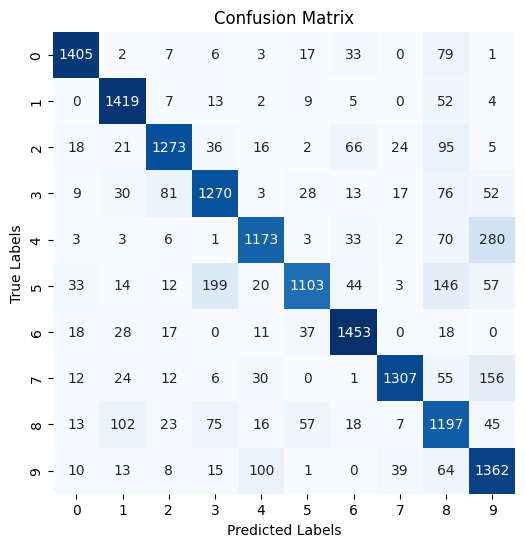

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Tampilkan confusion matrix dalam bentuk heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", square=True, cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

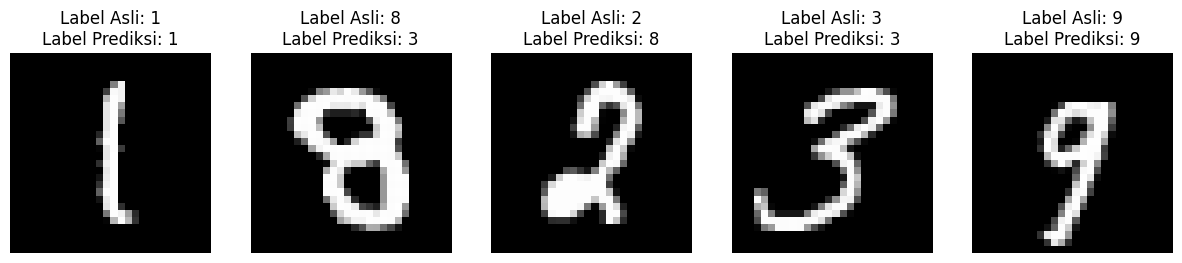

In [52]:
from sklearn.naive_bayes import MultinomialNB

# Membuat dan melatih model Multinomial Naive Bayes
mnb2 = MultinomialNB()
mnb2.fit(X_train, y_train)

# Pilih beberapa contoh citra dari data pengujian
num_samples = 5  # Ganti jumlah contoh yang ingin ditampilkan sesuai kebutuhan

# Membuat layout subplot horizontal
fig, axs = plt.subplots(1, num_samples, figsize=(15, 4))

for i in range(num_samples):
    sample_index = np.random.randint(len(X_test))
    sample_image = X_test[sample_index]
    true_label = y_test[sample_index]

    # Prediksi dengan model Multinomial Naive Bayes
    nb_prediction = mnb2.predict([sample_image])[0]

    # Menampilkan citra pengujian dan hasil prediksi
    axs[i].imshow(np.reshape(sample_image, (28, 28)), cmap='gray')
    axs[i].set_title(f"Label Asli: {true_label}\nLabel Prediksi: {nb_prediction}")
    axs[i].axis('off')

plt.show()

**SVM**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.svm import SVC

svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(report)

**Rasio 90:10**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.1, random_state=42)

**naive bayes**